In [1]:
import pandas as pd
import numpy as np
import cv2    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import np_utils
from keras.optimizers import SGD

from IPython.core.display import display, HTML
from PIL import Image
from io import BytesIO
import base64

plt.style.use('ggplot')

%matplotlib inline

In [2]:
import io
import cv2
from PIL import Image

In [3]:
import tensorflow as tf

In [31]:
cap = cv2.VideoCapture(0)

# Capture frame-by-frame
ret, frame = cap.read()
file = 'live.png'
#frame = cv2.resize(frame, (178,218)) 
cv2.imwrite( file,frame,)
cv2.imshow('frame',frame)

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

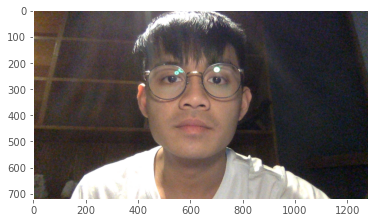

In [32]:
# plot picture and attributes
img = load_img('live.png')
plt.grid(False)
plt.imshow(img)

In [33]:
image = Image.open('live.png')
new_image = image.resize((178,218))
new_image.save('live_resize.png')

In [42]:
new_image.show()

In [34]:
def load_reshape_img(fname):
    img = load_img(fname)
    x = img_to_array(img)/255.
    x = x.reshape((1,) + x.shape)

    return x

In [35]:
x=load_reshape_img('live_resize.png')

In [36]:
x.shape

(1, 218, 178, 3)

In [37]:
# Recreate the exact same model, including its weights and the optimizer
model_ = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
model_.summary()

Model: "functional_26"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 218, 178, 3) 0                                            
__________________________________________________________________________________________________
conv2d_376 (Conv2D)             (None, 108, 88, 32)  864         input_23[0][0]                   
__________________________________________________________________________________________________
batch_normalization_376 (BatchN (None, 108, 88, 32)  96          conv2d_376[0][0]                 
__________________________________________________________________________________________________
activation_425 (Activation)     (None, 108, 88, 32)  0           batch_normalization_376[0][0]    
______________________________________________________________________________________

In [38]:
#load the best model
model_.load_weights('weights.best.inc.male.hdf5')

In [39]:
# generate prediction
model_predictions = np.argmax(model_.predict(x))  

In [40]:
model_.predict(x)

array([[0.2523114 , 0.74768865]], dtype=float32)

In [41]:
model_predictions 

1